Аппроксимация для (x - 1910)^n
N=2: предсказано 2010 - 312470336, ошибка = 1.206%
N=3: предсказано 2010 - 309020979, ошибка = 0.089%
N=4: предсказано 2010 - 305706175, ошибка = 0.984%
N=5: предсказано 2010 - 340607732, ошибка = 10.320%


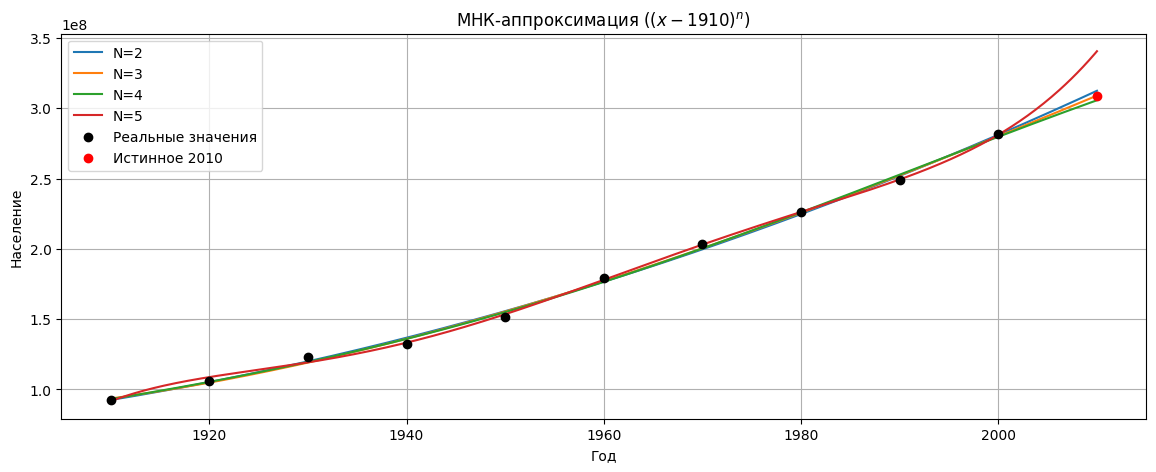

Аппроксимация для ((x - 1955)/45)^n
N=2: предсказано 2010 - 312470336, ошибка = 1.206%
N=3: предсказано 2010 - 309020979, ошибка = 0.089%
N=4: предсказано 2010 - 305706175, ошибка = 0.984%
N=5: предсказано 2010 - 340607732, ошибка = 10.320%


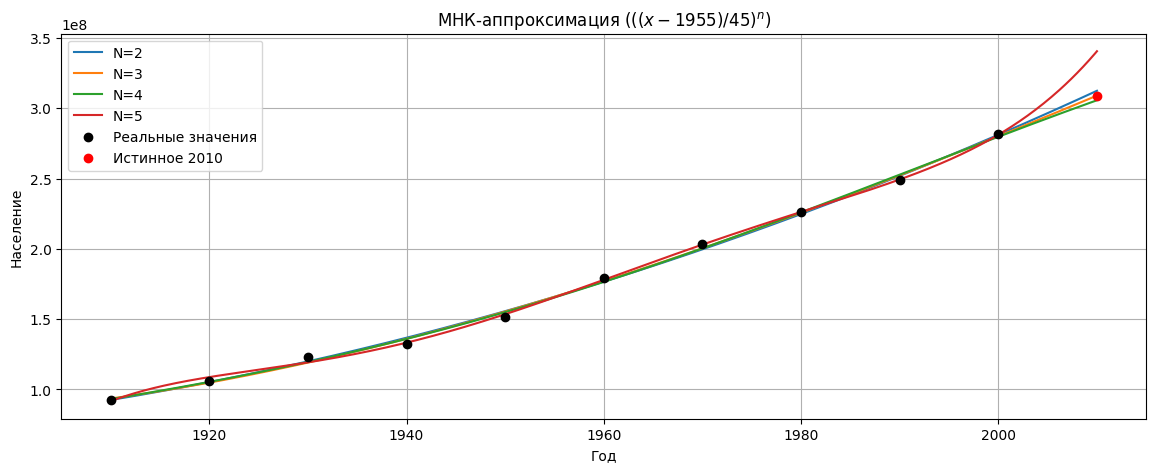

Функционал F для базиса (x - 1910)^n
N=2: F = 8.492e+13
N=3: F = 7.993e+13
N=4: F = 7.839e+13
N=5: F = 3.193e+13

Функционал F для базиса ((x - 1955)/45)^n
N=2: F = 8.492e+13
N=3: F = 7.993e+13
N=4: F = 7.839e+13
N=5: F = 3.193e+13


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Года
years = np.array([1910,1920,1930,1940,1950,1960,1970,1980,1990,2000], dtype=float)

# Население
population = np.array([92228496, 106021537, 123202624, 132164569, 151325798,
                       179323175, 203211926, 226545805, 248709873, 281421906], dtype=float)

# Точное значение 2010
actual_2010 = 308745538

# Скалярное произведение векторов
def dot_product(u, v):
    return np.dot(u, v)

# Построение матрицы МНК
def build_system(basis, y_values):
    n = len(basis)
    M = np.zeros((n, n))
    b = np.zeros(n)
    
    # преобразуем в вектор значений для каждого года
    g = [g_i(years) for g_i in basis] 
    
    for i in range(n):
        b[i] = dot_product(g[i], y_values)
        for j in range(n):
            M[i, j] = dot_product(g[i], g[j])
    return M, b

# Аппроксимация
def approx(basis_func, N_values):
    coeffs_dict = {}
    mean_2010_dict = {}

    for N in N_values:
        basis = basis_func(N)
        M, b_vec = build_system(basis, population)
        alpha = np.linalg.solve(M, b_vec)
        coeffs_dict[N] = alpha

        g2010 = np.array([b(2010) for b in basis])
        mean2010 = np.dot(alpha, g2010)
        mean_2010_dict[N] = mean2010
        rel_err = abs(mean2010 - actual_2010)/actual_2010*100

        print(f"N={N}: предсказано 2010 - {mean2010:.0f}, ошибка = {rel_err:.3f}%")

    return coeffs_dict

# Построение графика
def plot_approx(basis_func, coeffs_dict, label):
    x_dense = np.linspace(years[0], 2010, 500)
    plt.figure(figsize=(14,5))

    for N, alpha in coeffs_dict.items():
        basis = basis_func(N)
        g_dense = np.vstack([b(x_dense) for b in basis])
        p_dense = np.dot(alpha, g_dense)
        plt.plot(x_dense, p_dense, label=f"N={N}")

    plt.scatter(years, population, color='black', zorder=5, label='Реальные значения')
    plt.scatter([2010], [actual_2010], color='red', label='Истинное 2010', zorder=6)
    plt.xlabel("Год")
    plt.ylabel("Население")
    plt.title(f"МНК-аппроксимация ({label})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Подсчет минимизурующего функционала МНК F
def calc_F(basis_func, N_values):
    for N in N_values:
        basis = basis_func(N)
        M, b_vec = build_system(basis, population)
        alpha = np.linalg.solve(M, b_vec)
        residual = population - np.dot(np.vstack([b(years) for b in basis]).T, alpha)
        F = np.sum(residual**2)
        print(f"N={N}: F = {F:.3e}")

# Базисы для пунктов (б) и (г)
def basis_b(N):  # (x - 1910)^n
    return [lambda x, n=n: (x - 1910)**n for n in range(N+1)]

def basis_d(N):  # ((x - 1955)/45)^n
    return [lambda x, n=n: ((x - 1955)/45)**n for n in range(N+1)]


print("Аппроксимация для (x - 1910)^n")
coeffs_b = approx(basis_b, [2,3,4,5])
plot_approx(basis_b, coeffs_b, r"$(x - 1910)^n$")

print("Аппроксимация для ((x - 1955)/45)^n")
coeffs_d = approx(basis_d, [2,3,4,5])
plot_approx(basis_d, coeffs_d, r"$((x - 1955)/45)^n$")

print("Функционал F для базиса (x - 1910)^n")
calc_F(basis_b, [2,3,4,5])

print("\nФункционал F для базиса ((x - 1955)/45)^n")
calc_F(basis_d, [2,3,4,5])